# Description

UPDATE

It generates different general plots to compare coefficient values from Pearson, Spearman and Clustermatch, such as their distribution.

In `Settings` below, the data set and other options (such as tissue for GTEx) are specified.

# Modules

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

from clustermatch.plots import plot_histogram, plot_cumulative_histogram, jointplot
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this is used for the cumulative histogram
GENE_PAIRS_PERCENT = 0.70

# Paths

In [4]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [5]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}" / "mic"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/mic')

In [6]:
# INPUT_CORR_FILE_TEMPLATE = (
#     DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
#     / DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# )
# display(INPUT_CORR_FILE_TEMPLATE)

In [7]:
COMPARISONS_DIR = DATASET_CONFIG["RESULTS_DIR"] / "comparison_others"
display(COMPARISONS_DIR)

PosixPath('/opt/data/results/gtex_v8/comparison_others')

In [8]:
INPUT_FILE = COMPARISONS_DIR / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}-all.pkl"
display(INPUT_FILE)

assert INPUT_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/comparison_others/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

In [9]:
corrs_df = pd.read_pickle(INPUT_FILE)

In [10]:
corrs_df.shape

(98777, 5)

In [11]:
corrs_df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000068305.17      0.418721  0.731029  0.814622   
                   ENSG00000068976.13      0.259050  0.104405  0.611387   
                   ENSG00000082014.16      0.243071  0.472377  0.622091   
                   ENSG00000090104.11      0.245699  0.047116  0.314198   
                   ENSG00000103335.21      0.026871  0.019368  0.001063   

                                            mic mic_subset  
ENSG00000000419.12 ENSG00000068305.17  0.581482      agree  
                   ENSG00000068976.13  0.421551   disagree  
                   ENSG00000082014.16  0.419834      agree  
                   ENSG00000090104.11  0.453207   disagree  
                   ENSG00000103335.21  0.190166        all

## Data stats

In [12]:
corrs_df.describe().applymap(str)

,clustermatch,pearson,spearman,mic
count,98777.0,98777.0,98777.0,98777.0
mean,0.1801779987766514,0.2503012602627764,0.44015888735049596,0.33137492021341725
std,0.1418185180661169,0.25276980947337924,0.2518403669018857,0.14257982265925045
min,0.0,1.99629903141485e-06,7.249610343151858e-07,0.11619056945361894
25%,0.03297146491338869,0.06451917768320614,0.18856789693523335,0.19534609267596065
50%,0.19113108402416004,0.1097273593753264,0.5021135435402767,0.33195723525007725
75%,0.2617620158093953,0.4595659981219502,0.6240287544890419,0.41000715174950847
max,0.8374336213904493,0.9882918333878858,0.980220424166699,0.952403400973687


In [13]:
# skewness
corrs_df.drop(columns=["mic_subset"]).apply(lambda x: stats.skew(x))

clustermatch    0.623392
pearson         0.972242
spearman       -0.199870
mic             0.681224
dtype: float64

# MIC subset: all gene pairs

In [14]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "all"

## Select MIC subset

In [15]:
df = corrs_df[corrs_df["mic_subset"].isin((mic_subset,))].drop(columns=["mic_subset"])

In [16]:
# define order
# df = df[["clustermatch", "mic", "pearson", "spearman"]]

In [17]:
df.shape

(33000, 4)

In [18]:
df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000103335.21      0.026871  0.019368  0.001063   
                   ENSG00000119013.8       0.411877  0.731489  0.800159   
                   ENSG00000126262.4       0.253667  0.525495  0.649911   
                   ENSG00000139318.7       0.352812  0.623665  0.767859   
                   ENSG00000173757.9       0.378501  0.696901  0.782771   

                                            mic  
ENSG00000000419.12 ENSG00000103335.21  0.190166  
                   ENSG00000119013.8   0.569112  
                   ENSG00000126262.4   0.391753  
                   ENSG00000139318.7   0.518348  
                   ENSG00000173757.9   0.528719

## Histogram plot

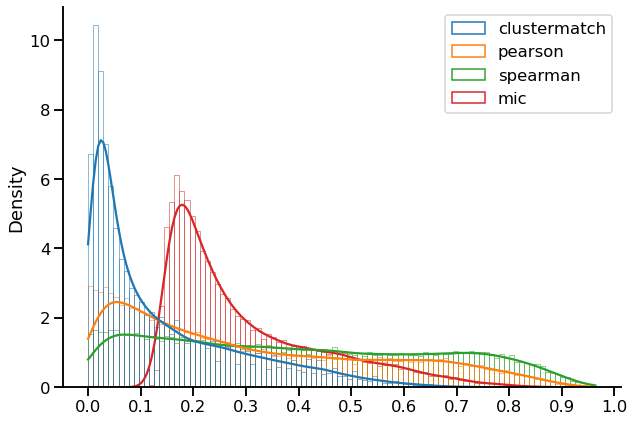

In [19]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=OUTPUT_FIGURE_DIR, fill=False)

**UPDATE**

Coefficients' values distribute very differently. Clustermatch is skewed to the left, whereas Pearson and specially Spearman seem more uniform.

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

clustermatch    0.177429
mic             0.343585
pearson         0.431369
spearman        0.561183
Name: 0.7, dtype: float64

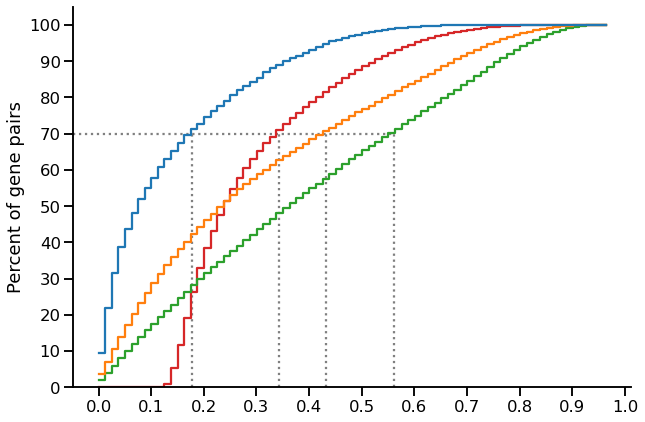

In [20]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=OUTPUT_FIGURE_DIR)

## Joint plots comparing each coefficient

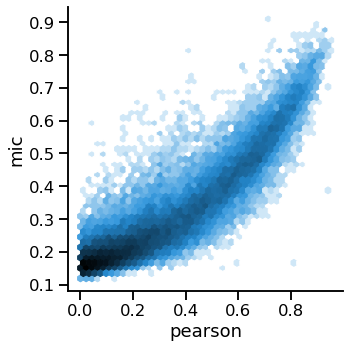

In [21]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="pearson",
        y="mic",
        add_corr_coefs=False,
        output_dir=OUTPUT_FIGURE_DIR,
    )

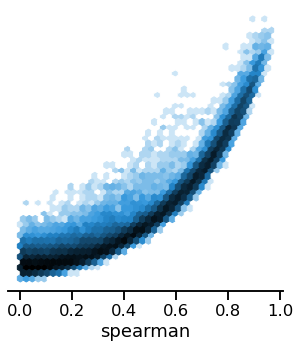

In [22]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "spearman", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

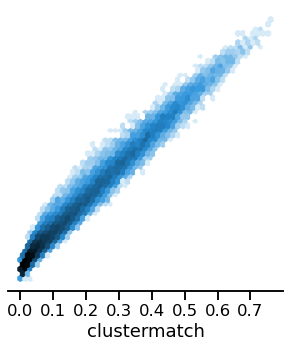

In [23]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "clustermatch", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

## Compute correlations

In [24]:
df.corr()

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.879331,0.904386,0.987014
pearson,0.879331,1.000000,0.931904,0.904364
spearman,0.904386,0.931904,1.000000,0.915545
mic,0.987014,0.904364,0.915545,1.000000


In [25]:
df.corr("spearman")

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.868923,0.943430,0.977978
pearson,0.868923,1.000000,0.917696,0.878114
spearman,0.943430,0.917696,1.000000,0.928737
mic,0.977978,0.878114,0.928737,1.000000


# MIC subset: "agree" gene pairs

In [26]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "agree"

## Select MIC subset

In [27]:
df = corrs_df[corrs_df["mic_subset"].isin((mic_subset,))].drop(columns=["mic_subset"])

In [28]:
# define order
# df = df[["clustermatch", "mic", "pearson", "spearman"]]

In [29]:
df.shape

(32907, 4)

In [30]:
df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000068305.17      0.418721  0.731029  0.814622   
                   ENSG00000082014.16      0.243071  0.472377  0.622091   
                   ENSG00000111052.7       0.446659  0.794302  0.830073   
                   ENSG00000111897.6       0.432578  0.785013  0.827918   
                   ENSG00000135535.15      0.505232  0.838339  0.884324   

                                            mic  
ENSG00000000419.12 ENSG00000068305.17  0.581482  
                   ENSG00000082014.16  0.419834  
                   ENSG00000111052.7   0.630059  
                   ENSG00000111897.6   0.616518  
                   ENSG00000135535.15  0.676016

## Histogram plot

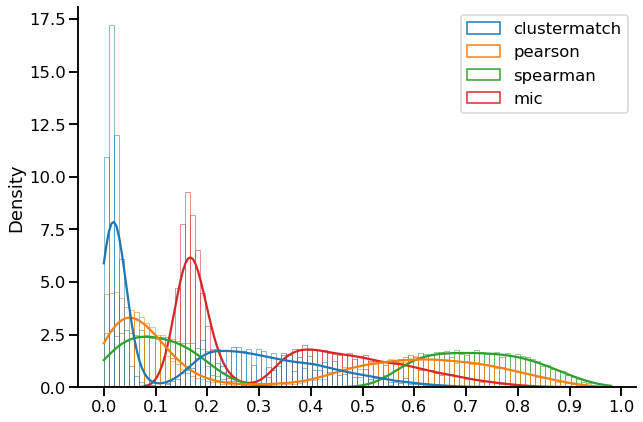

In [31]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=None, fill=False)

**UPDATE**

Coefficients' values distribute very differently. Clustermatch is skewed to the left, whereas Pearson and specially Spearman seem more uniform.

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

clustermatch    0.278331
mic             0.444001
pearson         0.586998
spearman        0.690904
Name: 0.7, dtype: float64

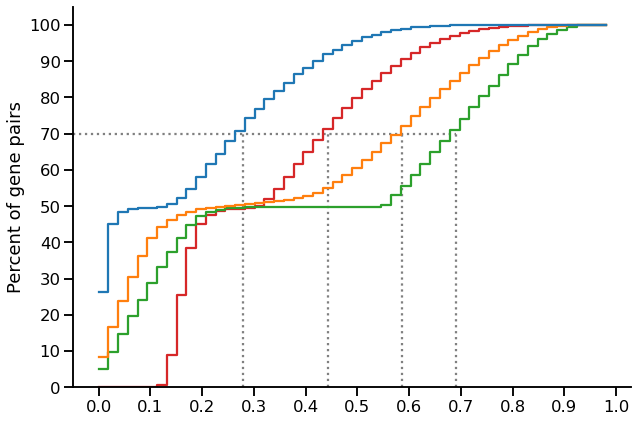

In [32]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=None)

## Joint plots comparing each coefficient

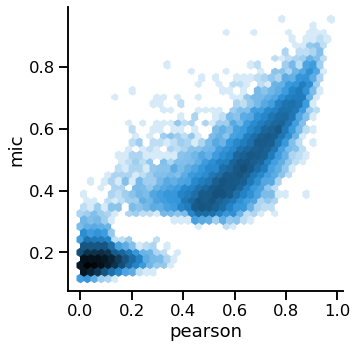

In [33]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="pearson",
        y="mic",
        add_corr_coefs=False,
        output_dir=None,
    )

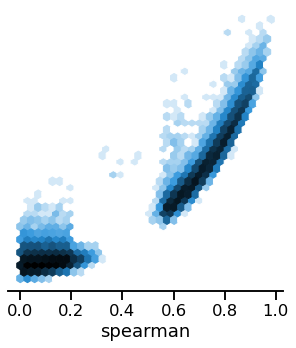

In [34]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "spearman", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    # g.savefig(
    #     OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
    #     bbox_inches="tight",
    #     dpi=300,
    #     facecolor="white",
    # )

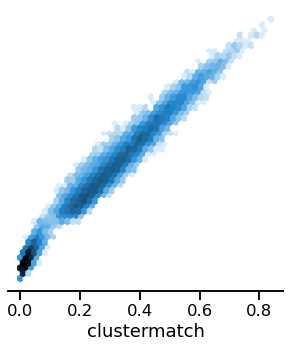

In [35]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "clustermatch", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    # g.savefig(
    #     OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
    #     bbox_inches="tight",
    #     dpi=300,
    #     facecolor="white",
    # )

## Compute correlations

In [36]:
df.corr()

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.928816,0.940491,0.991394
pearson,0.928816,1.000000,0.969452,0.944371
spearman,0.940491,0.969452,1.000000,0.949775
mic,0.991394,0.944371,0.949775,1.000000


In [37]:
df.corr("spearman")

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.866679,0.911291,0.971737
pearson,0.866679,1.000000,0.902417,0.874328
spearman,0.911291,0.902417,1.000000,0.897948
mic,0.971737,0.874328,0.897948,1.000000


# MIC subset: "disagree" gene pairs

In [38]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "disagree"

## Select MIC subset

In [39]:
df = corrs_df[corrs_df["mic_subset"].isin((mic_subset,))].drop(columns=["mic_subset"])

In [40]:
# define order
# df = df[["clustermatch", "mic", "pearson", "spearman"]]

In [41]:
df.shape

(32870, 4)

In [42]:
df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000068976.13      0.259050  0.104405  0.611387   
                   ENSG00000090104.11      0.245699  0.047116  0.314198   
                   ENSG00000111537.4       0.250997  0.055067  0.390374   
                   ENSG00000130208.9       0.186508  0.109511  0.467880   
                   ENSG00000140403.12      0.210187  0.091934  0.384598   

                                            mic  
ENSG00000000419.12 ENSG00000068976.13  0.421551  
                   ENSG00000090104.11  0.453207  
                   ENSG00000111537.4   0.396041  
                   ENSG00000130208.9   0.321916  
                   ENSG00000140403.12  0.356638

## Histogram plot

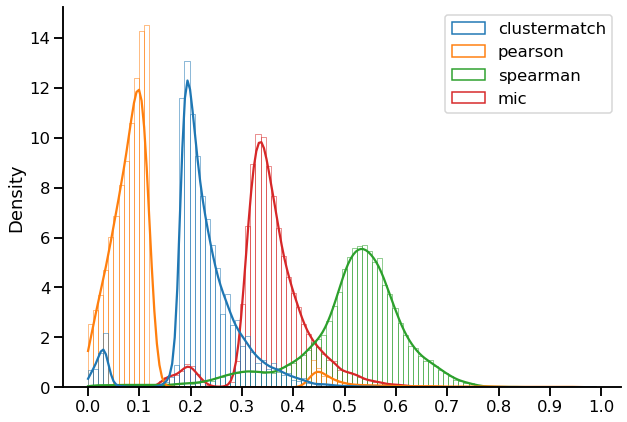

In [43]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=None, fill=False)

**UPDATE**

Coefficients' values distribute very differently. Clustermatch is skewed to the left, whereas Pearson and specially Spearman seem more uniform.

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

pearson         0.101516
clustermatch    0.245699
mic             0.380129
spearman        0.564887
Name: 0.7, dtype: float64

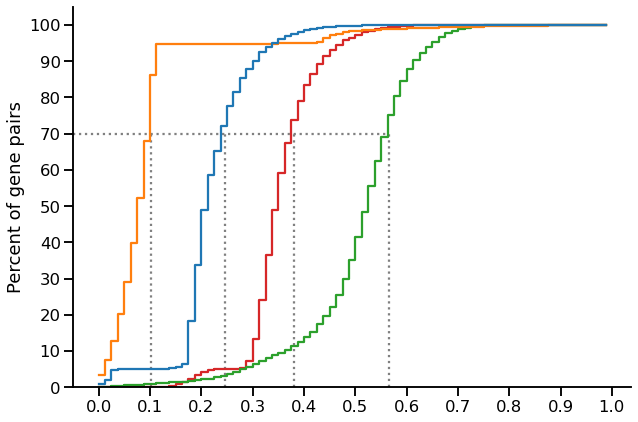

In [44]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=None)

## Joint plots comparing each coefficient

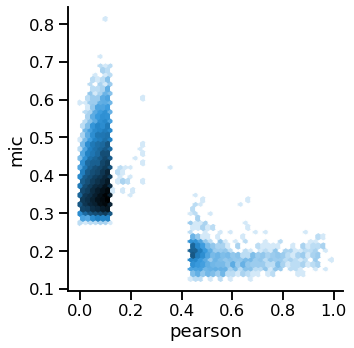

In [45]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="pearson",
        y="mic",
        add_corr_coefs=False,
        output_dir=None,
    )

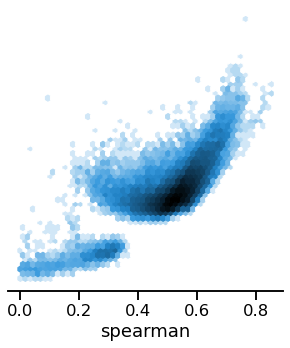

In [46]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "spearman", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    # g.savefig(
    #     OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
    #     bbox_inches="tight",
    #     dpi=300,
    #     facecolor="white",
    # )

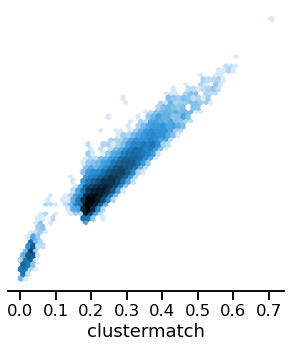

In [47]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "clustermatch", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    # g.savefig(
    #     OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
    #     bbox_inches="tight",
    #     dpi=300,
    #     facecolor="white",
    # )

## Compute correlations

In [48]:
df.corr()

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,-0.584308,0.725616,0.945670
pearson,-0.584308,1.000000,-0.590724,-0.526107
spearman,0.725616,-0.590724,1.000000,0.713210
mic,0.945670,-0.526107,0.713210,1.000000


In [49]:
df.corr("spearman")

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,-0.111909,0.584528,0.865422
pearson,-0.111909,1.000000,-0.138416,-0.080035
spearman,0.584528,-0.138416,1.000000,0.645867
mic,0.865422,-0.080035,0.645867,1.000000
